# Project 4: Graph Algorithms - Part 1

In [20]:
library ("igraph")
library ("clevr")

In [21]:
# Reading the csv files
path = "finance_data/data/"
out.file<-""
file.names <- dir(path, pattern =".csv")
m <- matrix(, nrow = 0, ncol = 765)
sectors.table <- read.table("finance_data/Name_sector.csv",header=TRUE, sep=",", stringsAsFactors=TRUE)
sectors = c()
sectors.names <- c()
for(i in 1:length(file.names)){
    file <- read.table(paste("finance_data/data/",file.names[i],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
    if(length(file$Close)==765){
        m <- rbind(m, matrix(file$Close, nrow=1, ncol=765))
        mystr <- substr(file.names[i], 1, nchar(file.names[i])-4)
        sector <- sectors.table$Sector[which(sectors.table$Symbol == mystr)]
        sectors.names = c(sectors.names, toString(sector))
    }
}

In [22]:
# Printing the sector details
com_num = length(sectors.names)
data_num = ncol(m)
sector.set<-as.factor(sectors.names)
sectors.index<-as.numeric(sector.set)
num_sector <- length(unique(sectors.index))
table(sector.set)

sector.set
    Consumer Discretionary           Consumer Staples 
                        84                         36 
                    Energy                 Financials 
                        34                         63 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

QUESTION 1: What are upper and lower bounds on $p_{ij}$? Provide a justification for using log-normalized return ($r_i(t)$) instead of regular return ($q_i(t)$).

QUESTION 2: Plot a histogram showing the un-normalized distribution of edge weights.

In [23]:
cal_cor<-function(comp_date){
log_val <- matrix(nrow=nrow(comp_date), ncol= ncol(comp_date)-1)
for(j in 1:nrow(comp_date)){
        log_val[j,] = diff(log(comp_date[j, ]))}
log_avg <- rowMeans(log_val)
temp <- cor(t(log_val))
return(temp)
    }

In [24]:
temp <- cal_cor(m)
d <- sqrt(2 * (1 - temp))
g<-graph_from_adjacency_matrix(d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)
fname <- matrix(d)
save(fname, file = "distance.RData")

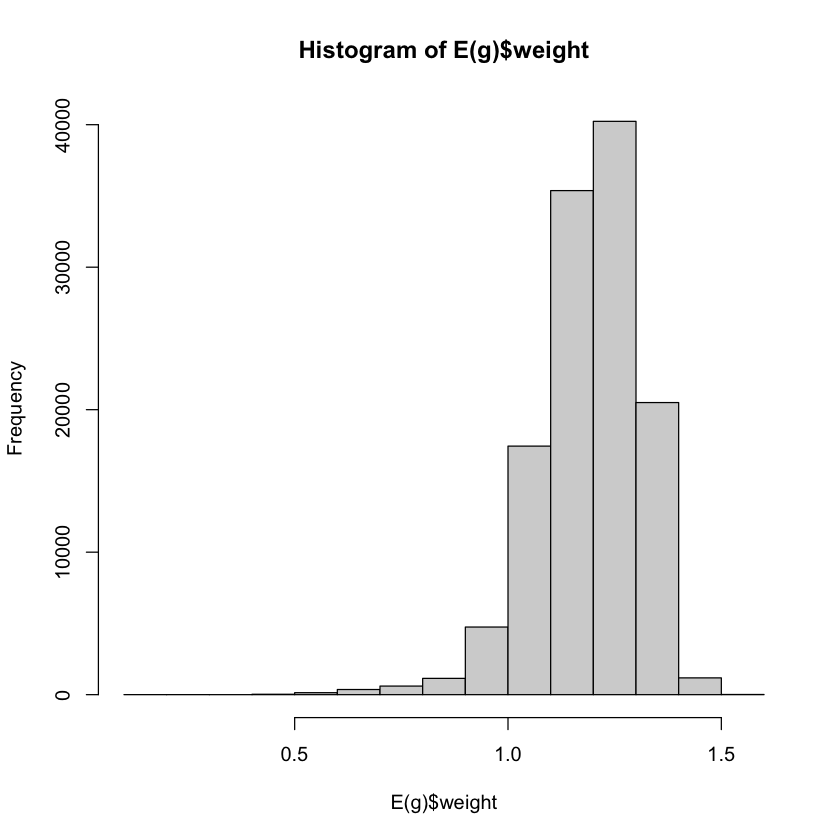

In [25]:
# Plotting the un-normalized distribution of edge weights
hist(E(g)$weight)

QUESTION 3: Extract the MST of the correlation graph. Each stock can be categorized into a sector, which can be found in Name_sector.csv file. Plot the MST and color-code the nodes based on sectors. Do you see any pattern in the MST? The structures that you find in MST are called Vine clusters. Provide a detailed explanation about the pattern you observe.

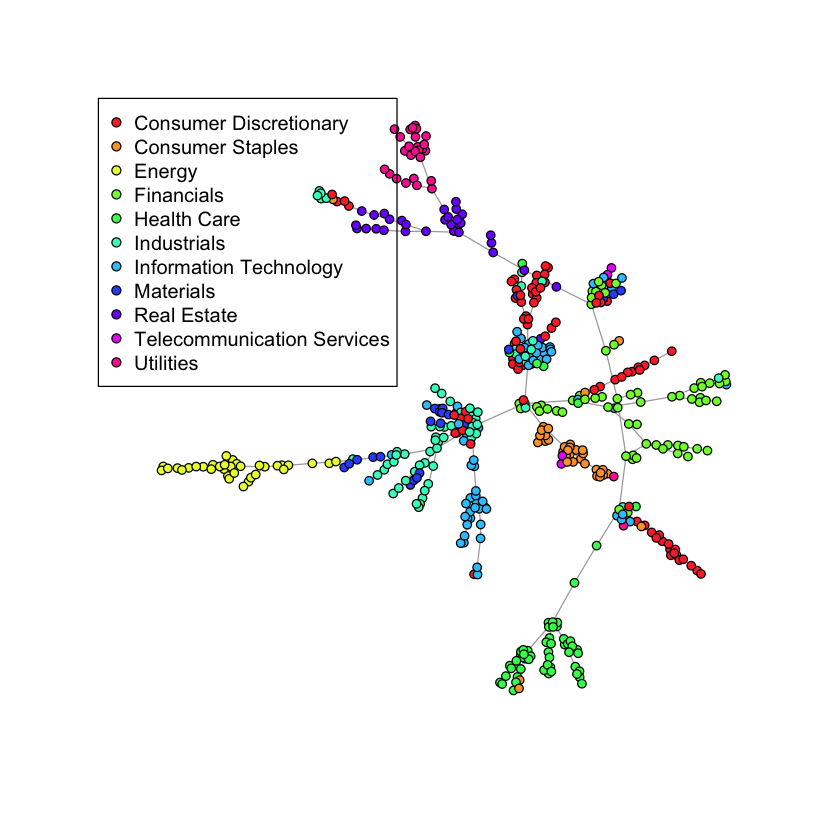

In [26]:
# Extracting and plotting the minimum spanning tree of the correlation graph
mst_g <- mst(g, algorithm = 'prim')
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_g, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

We can see that most stocks within the same sector are in the same general area of the MST. There appears to be clustering within the tree.

QUESTION 4: Run a community detection algorithm (for example walktrap) on the MST obtained above. Plot the communities formed. Compute the homogeneity and completeness of the clustering. (you can use the ’clevr’ library in r to compute homogeneity and completeness).

[1] 33

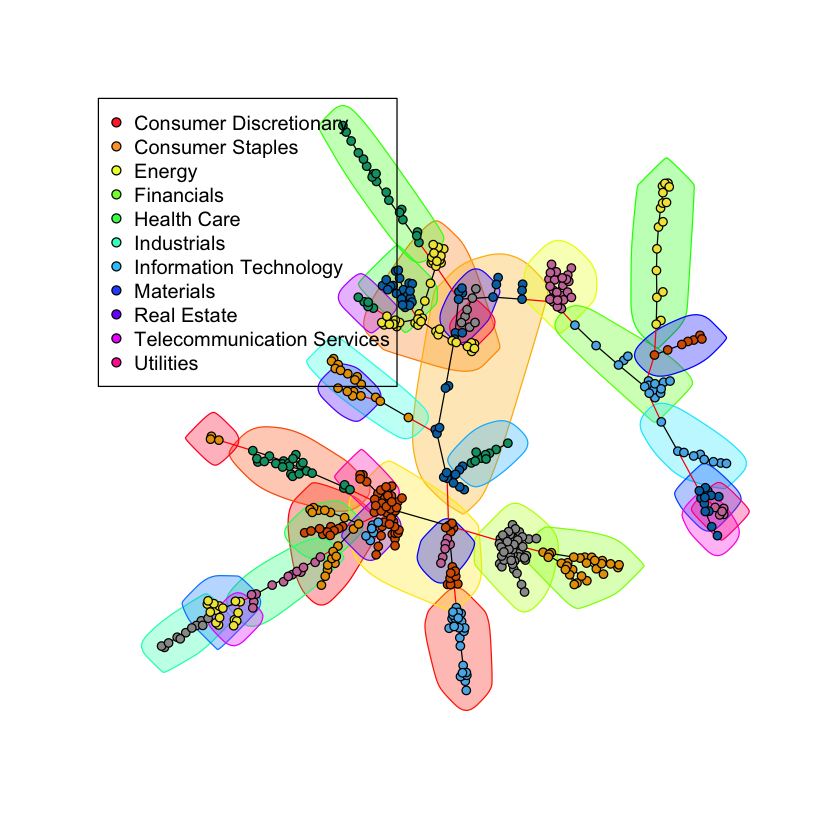

In [27]:
# Clustering of correlation graph
wc_daily <- walktrap.community(mst_g, weights= E(mst_g)$weights, modularity = TRUE) 
length(wc_daily)
plot(wc_daily, mst_g, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [28]:
# Computing the homogeneity and completeness of the clustering
true<- c(sectors.index)
pred <- c(wc_daily$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.6826446

[1] 0.4792845

QUESTION 5: Report the value of $\alpha$ for the above two cases and provide an interpretation for the difference.

In [39]:
# Storing the sector list
Si <- c()
for(i in c(1:num_sector)){
  print(length(which(sectors.index==i)))
  Si[i] <- length(which(sectors.index==i))
}

[1] 84
[1] 36
[1] 34
[1] 63
[1] 60
[1] 64
[1] 66
[1] 24
[1] 31
[1] 4
[1] 28


In [40]:
# Daily computation
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_g))){
    neighbors_v = neighbors(mst_g,v)
    N_i = length(neighbors_v)
    Q_i=0
    for(i in neighbors_v){
        if(sectors.index[i]==sectors.index[v])
            Q_i=Q_i+1
    }
    current_sector = sectors.index[v]


    p_method_1[v] = Q_i/N_i    
    p_method_2[v] = Si[current_sector]/vcount(mst_g)
}
alpha_1 = sum(p_method_1)/vcount(mst_g)
print(sprintf("Alpha value (Daily) for method 1 is: %s",alpha_1))
alpha_2 = sum(p_method_2)/vcount(mst_g)
print(sprintf("Alpha value (Daily) for method 2 is: %s",alpha_2))

[1] "Alpha value (Daily) for method 1 is: 0.828930077530676"
[1] "Alpha value (Daily) for method 2 is: 0.114188070612532"


QUESTION 6: Repeat questions 2,3,4,5 on the WEEKLY data.

In [29]:
file <- read.table(paste("finance_data/data/",file.names[1],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
Date_data<- file$Date
weekdays_data <-weekdays(as.Date(Date_data))

weekly_m_m <- m[,which("Monday" == weekdays_data)]
week_m_cor <- cal_cor(weekly_m_m)
week_m_d <- sqrt(2 * (1 - week_m_cor))


week_m_g<-graph_from_adjacency_matrix(week_m_d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)



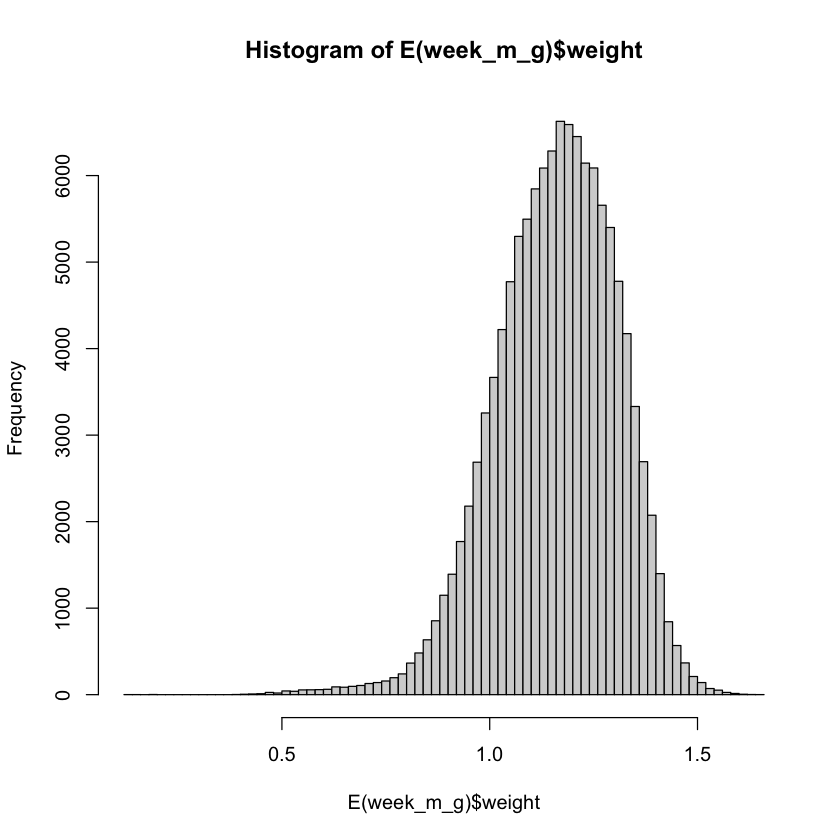

In [30]:
# Plotting the un-normalized distribution of edge weights
hist(E(week_m_g)$weight,breaks = 100)

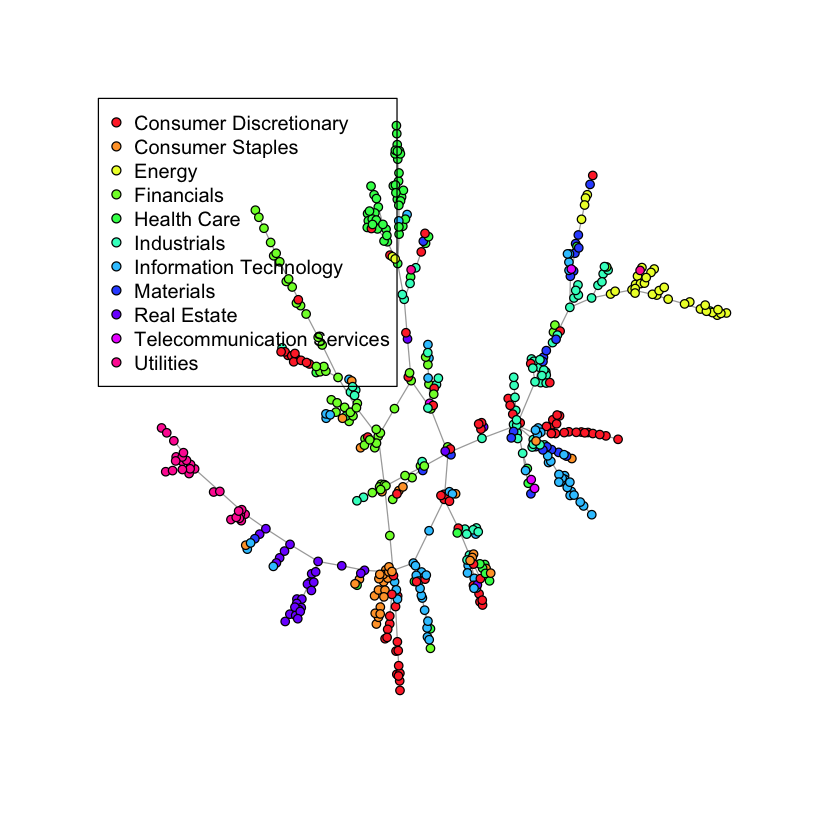

In [31]:
# Extracting and plotting the minimum spanning tree of the correlation graph
mst_gw <- mst(week_m_g)
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_gw, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

[1] 42

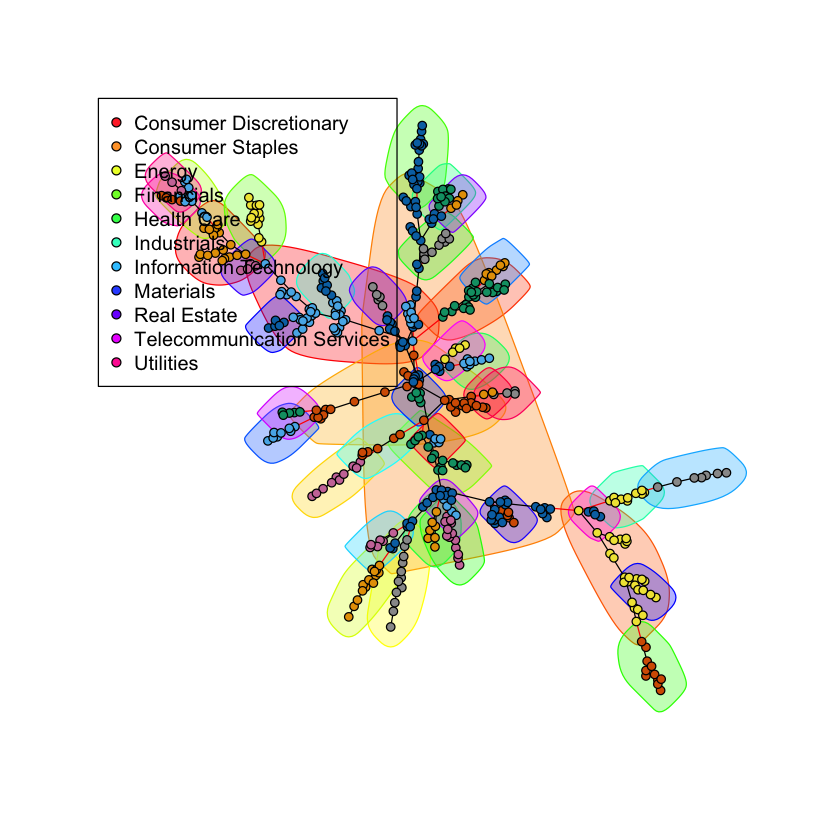

In [32]:
# Clustering of correlation graph
wc_weekly <- walktrap.community(mst_gw, weights= E(mst_gw)$weights, modularity = TRUE) 
length(wc_weekly)
plot(wc_weekly, mst_gw, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [33]:
# Computing the homogeneity and completeness of the clustering
true<- c(sectors.index)
pred <- c(wc_weekly$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.582007

[1] 0.3907714

In [41]:
# Weekly computation
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_gw))){
    neighbors_v = neighbors(mst_gw,v)
    N_i = length(neighbors_v)
    Q_i=0
    for(i in neighbors_v){
        if(sectors.index[i]==sectors.index[v])
            Q_i=Q_i+1
    }
    current_sector = sectors.index[v]


    p_method_1[v] = Q_i/N_i    
    p_method_2[v] = Si[current_sector]/vcount(mst_gw)
}
alpha_1 = sum(p_method_1)/vcount(mst_gw)
print(sprintf("Alpha value (Weekly) for method 1 is: %s",alpha_1))
alpha_2 = sum(p_method_2)/vcount(mst_gw)
print(sprintf("Alpha value (Weekly) for method 2 is: %s",alpha_2))

[1] "Alpha value (Weekly) for method 1 is: 0.742969603495919"
[1] "Alpha value (Weekly) for method 2 is: 0.114188070612532"


QUESTION 7: Repeat questions 2,3,4,5 on the MONTHLY data.

In [34]:
dates_num <- format(as.Date(Date_data,format="%Y-%m-%d"), format = "%d")
monthly_15_m <- m[,which("15" == dates_num)]
monthly_15_cor <- cal_cor(monthly_15_m )
monthly_15_d <- sqrt(2 * (1 - monthly_15_cor))
month_15_g<-graph_from_adjacency_matrix(monthly_15_d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)

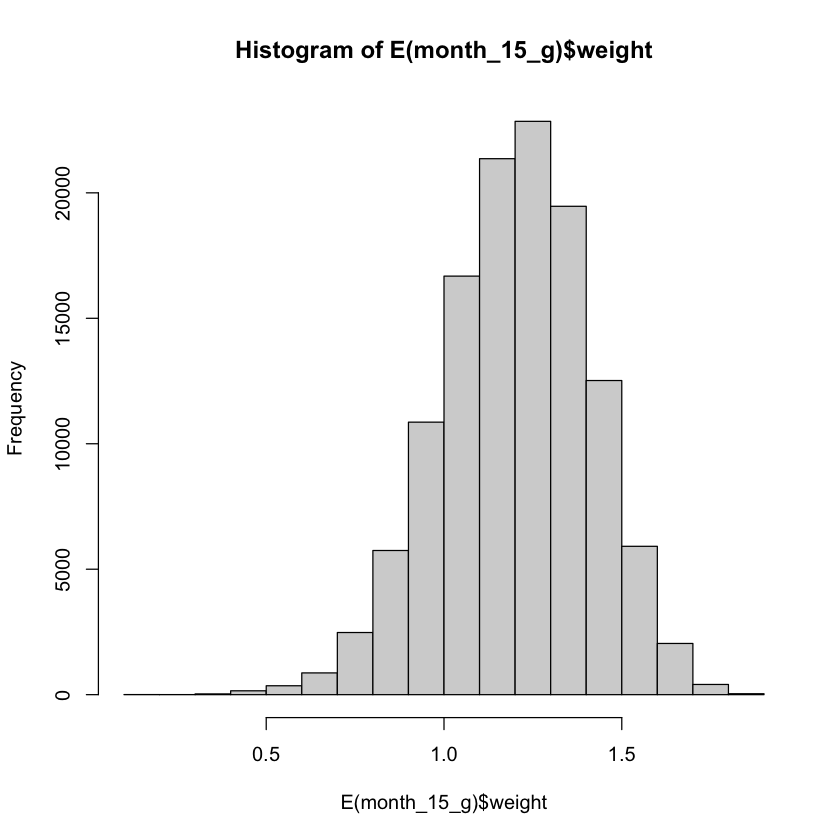

In [35]:
# Plotting the un-normalized distribution of edge weights
hist(E(month_15_g)$weight)

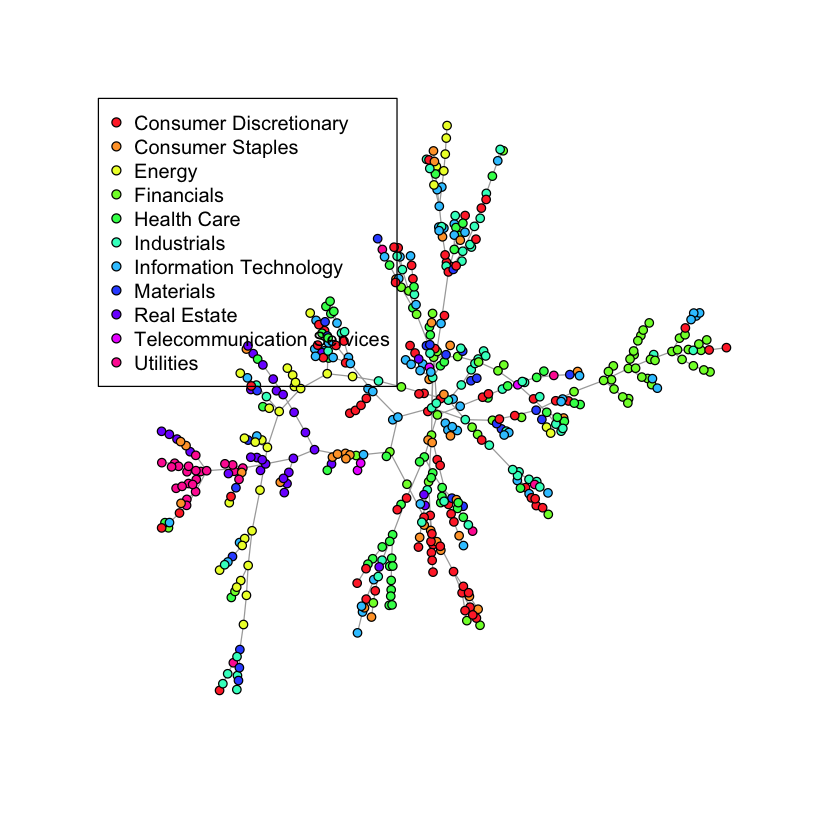

In [36]:
# Extracting and plotting the minimum spanning tree of the correlation graph
mst_gm <- mst(month_15_g)
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_gm, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

[1] 74

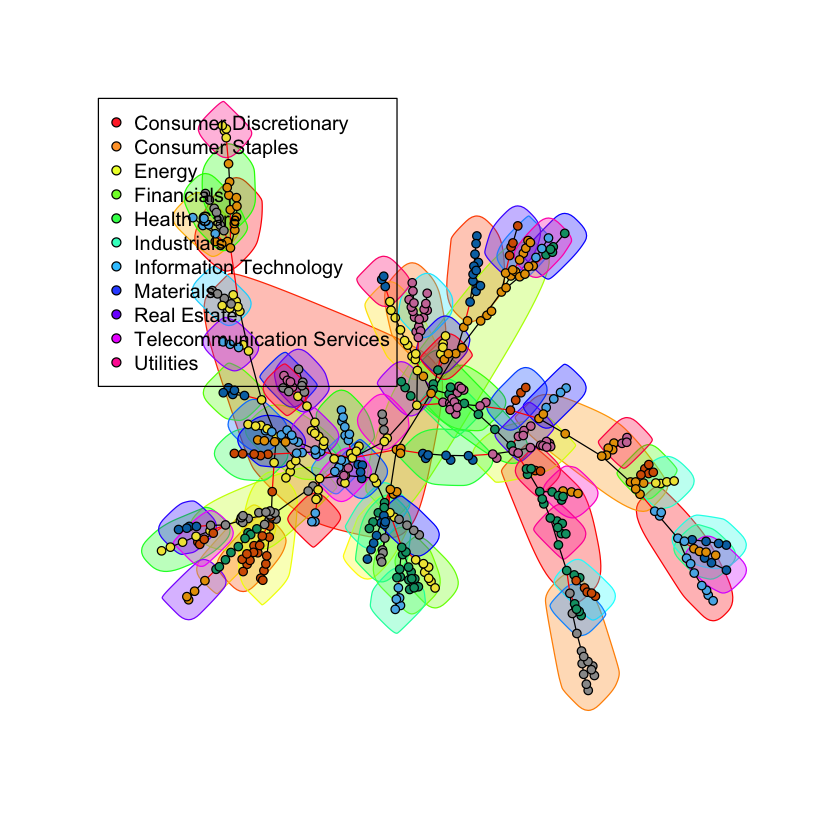

In [37]:
# Clustering of correlation graph
wc_monthly <- walktrap.community(mst_gm, weights= E(mst_gm)$weights, modularity = TRUE) 
length(wc_monthly)
plot(wc_monthly, mst_gm, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [38]:
# Computing the homogeneity and completeness of the clustering
true<- c(sectors.index)
pred <- c(wc_monthly$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.5095092

[1] 0.2823379

In [42]:
# Monthly computation
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_gm))){
    neighbors_v = neighbors(mst_gm,v)
    N_i = length(neighbors_v)
    Q_i=0
    for(i in neighbors_v){
        if(sectors.index[i]==sectors.index[v])
            Q_i=Q_i+1
    }
    current_sector = sectors.index[v]


    p_method_1[v] = Q_i/N_i    
    p_method_2[v] = Si[current_sector]/vcount(mst_gm)
}
alpha_1 = sum(p_method_1)/vcount(mst_gm)
print(sprintf("Alpha value (Monthly) for method 1 is: %s",alpha_1))
alpha_2 = sum(p_method_2)/vcount(mst_gm)
print(sprintf("Alpha value (Monthly) for method 2 is: %s",alpha_2))

[1] "Alpha value (Monthly) for method 1 is: 0.483468286099865"
[1] "Alpha value (Monthly) for method 2 is: 0.114188070612532"


QUESTION 8: Compare and analyze all the results of daily data vs weekly data vs monthly data. What trends do you find? What changes? What remains similar? Give reason for your observations. Which granularity gives the best results when predicting the sector of an unknown stock and why?

As we change the frequency of the data, we observe that the homogeneity and completeness scores of the clustering decrease, with the daily having the highest scores. The daily data produced the best, most coherent clusters. When predicting the sector of an unknown stock, we can infer that fluctuations from day to day are more stable than fluctuations across weeks or even months. Using consistent daily data gives us a more definitive way to predict than using erratic monthly data. 